In [19]:
from pathlib import Path
from Bio import SeqIO
import pandas as pd
import seaborn as sns

In [13]:
files = [file for file in Path("input").glob("**/*.fasta") if file.is_file()]
taxonomy = pd.read_csv("lib/taxgroups.csv",index_col=0)

In [35]:
seq_dict=pd.Series(dtype= "object")
for fasta_file in files:
    tax_group = taxonomy.loc[species,"Tax_group"]
    species = fasta_file.stem
    seqs= SeqIO.parse(fasta_file,"fasta")
    CPPs = []
    for seq_record in seqs:
        if "PPPPPPPPP" in seq_record.seq:
            CPPs.append(seq_record)
            seq_dict[seq_record.id] = seq_record
    if len(CPPs)>0:
        SeqIO.write(CPPs,f"output/CPPs/input/{tax_group}..{species}.fasta","fasta")

In [11]:
orthofinder_dirs = [p for p in Path(f"output/CPPs/OrthoFinder/").iterdir() if p.is_dir()]
orthofinder_results_dir =  orthofinder_dirs[-1]
orthofinder_results_dir

WindowsPath('output/CPPs/OrthoFinder/Results_Jan26')

In [15]:
orthogroups = pd.read_csv(
        orthofinder_results_dir / "Orthogroups/Orthogroups.tsv",
        sep="\t",
        index_col=0,
    )
print("Identified CPP {} Orthogroups.".format(orthogroups.shape[0]))

Identified CPP 124 Orthogroups.


In [39]:
seq_dict

Acropora_cervicornis_comp3754_c0_seq1     (A, S, G, Q, E, A, A, V, I, L, R, Q, A, Q, V, ...
Acropora_cervicornis_comp36773_c0_seq1    (K, E, T, E, E, L, A, S, T, D, Q, S, D, L, D, ...
Acropora_cervicornis_comp6063_c0_seq1     (K, Y, L, R, D, E, V, D, L, L, Q, T, K, L, E, ...
Acropora_digitifera_adi_v1.02265          (M, C, S, F, K, G, S, K, R, C, C, P, P, P, P, ...
Acropora_digitifera_adi_v1.05257          (M, N, K, F, K, N, R, Y, L, E, K, Y, F, P, E, ...
                                                                ...                        
Xenia_spec_Xe_011558_T1                   (M, N, K, Q, L, Q, S, P, S, P, P, S, P, S, T, ...
Xenia_spec_Xe_013137_T1                   (M, G, S, N, R, E, S, V, P, S, K, K, M, L, D, ...
Xenia_spec_Xe_016352_T1                   (M, G, K, E, Q, D, L, V, Q, A, I, R, T, N, D, ...
Xenia_spec_Xe_018438_T1                   (M, N, T, G, L, I, N, S, A, E, G, T, D, G, P, ...
Xenia_spec_Xe_018704_T1                   (M, E, E, S, M, E, K, S, E, V, I, H, N

In [48]:
for Orthogroup,row in orthogroups.iterrows():
    og_seqs = []
    for id in row.values:
        if pd.notna(id):
            if "," in id:
                ids = id.split(", ")
                for id in ids:
                   og_seqs.append(seq_dict.loc[id])  
            else:
                og_seqs.append(seq_dict.loc[id])
    SeqIO.write(og_seqs,f"output/CPPs/orthogroup_sequences/{Orthogroup}.fasta","fasta")


In [17]:
og_counts= pd.read_csv(
        orthofinder_results_dir / "Orthogroups/Orthogroups.GeneCount.tsv",
        sep="\t",
        index_col=0,
    )

<AxesSubplot: ylabel='Orthogroup'>

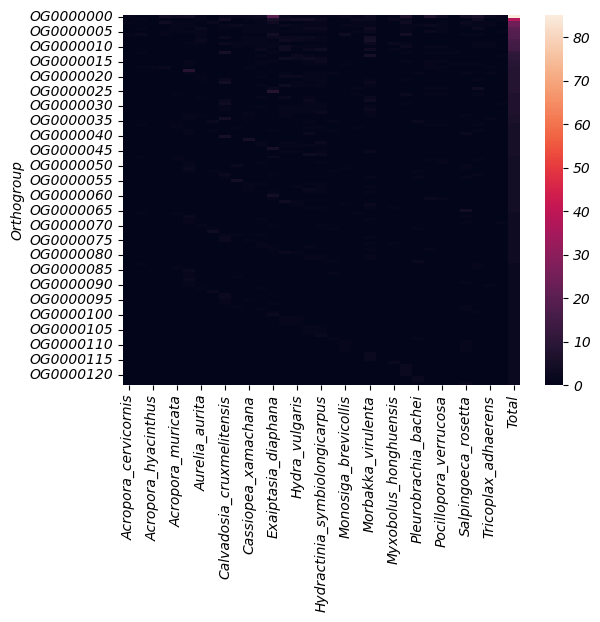

In [20]:
sns.heatmap(og_counts)